# Ecommerce Customer Payment Analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style = 'darkgrid')

In [2]:
def load_data(dataset):
    path = 'C:/pandas/Ecommerce Orders Project/'
    return pd.read_excel(path + f'{dataset}.xlsx')

In [3]:
orders_data = load_data('orders')
payments_data = load_data('order_payment')
customers_data = load_data('customers')

# Checking Data Quality

In [4]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [5]:
orders_data.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99444,99284,97661,96479,99444
mean,2017-12-31 08:39:25.959112448,2017-12-31 18:31:35.886919936,2018-01-04 21:46:02.311414016,2018-01-14 12:05:40.720612608,2018-01-24 03:04:49.755038208
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:40:13.500000,2017-09-12 23:08:40.249999872,2017-09-15 22:15:30,2017-09-25 22:06:21,2017-10-03 00:00:00
50%,2018-01-18 23:03:10.500000,2018-01-19 11:36:12.500000,2018-01-24 16:09:18,2018-02-02 19:27:51,2018-02-15 00:00:00
75%,2018-05-04 15:39:46.750000128,2018-05-04 20:31:35.500000,2018-05-08 13:37:00,2018-05-15 22:47:41.500000,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [6]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99444 entries, 0 to 99443
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99444 non-null  object        
 1   customer_id                    99444 non-null  object        
 2   order_status                   99444 non-null  object        
 3   order_purchase_timestamp       99444 non-null  datetime64[ns]
 4   order_approved_at              99284 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97661 non-null  datetime64[ns]
 6   order_delivered_customer_date  96479 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99444 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [7]:
payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,NaN


In [8]:
payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103887 non-null  object 
 1   payment_sequential    103887 non-null  int64  
 2   payment_type          103887 non-null  object 
 3   payment_installments  103887 non-null  int64  
 4   payment_value         103885 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
payments_data.describe()

,payment_sequential,payment_installments,payment_value
count,103887.000000,103887.000000,103885.000000
mean,1.092678,2.853350,154.100138
std,0.706580,2.687038,217.495269
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.840000
max,29.000000,24.000000,13664.080000


In [10]:
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


# Handling Missing data

In [12]:
def check_null(dataset):
    return dataset.isnull().sum()

In [13]:
def check_duplicate(dataset):
    return dataset.duplicated().sum()

In [14]:
check_null(orders_data)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
#check for missing data in the orders data
check_null(payments_data)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           2
dtype: int64

In [16]:
#check for missing data in the customers data
check_null(customers_data)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
# Since we are focus on payment value analysis, so that Null value of payment values are not important for us
# Drop rows with missing values in payment data
payments_data = payments_data.dropna()

In [18]:
# Check for duplicates in orders data
check_duplicate(orders_data)

3

In [19]:
# Remove Duplicates from orders data
orders_data = orders_data.drop_duplicates()

In [20]:
check_duplicate(payments_data)

1

In [21]:
#Remove Duplicates from payments data
payments_data = payments_data.drop_duplicates()

In [22]:
check_duplicate(customers_data)

0

# Merge Dataframes

In [23]:
# Merge orders data with payments data on order_id column
merged_data = pd.merge(orders_data,payments_data, on = 'order_id')

# Join the merged data with our customers data on the customer_id
final_data = pd.merge(merged_data, customers_data, on = 'customer_id')

In [24]:
final_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [25]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103884 entries, 0 to 103883
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103884 non-null  object        
 1   customer_id                    103884 non-null  object        
 2   order_status                   103884 non-null  object        
 3   order_purchase_timestamp       103884 non-null  datetime64[ns]
 4   order_approved_at              103709 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101996 non-null  datetime64[ns]
 6   order_delivered_customer_date  100752 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103884 non-null  datetime64[ns]
 8   payment_sequential             103884 non-null  int64         
 9   payment_type                   103884 non-null  object        
 10  payment_installments           103884 non-null  int64         
 11  

# Data Visualization

In [26]:
def cal_groupby_value(dataset, groupby_field, cal_field, cal_method, rename_col = None):
    data = dataset.groupby(groupby_field)[cal_field].agg(cal_method).reset_index()
    if rename_col:
        data.rename(columns = rename_col, inplace = True)
    return data

In [27]:
# Create a month_year, column from order_purchase_timestamp
final_data['year_month'] = final_data['order_purchase_timestamp'].dt.to_period('M')

# Aggregate payment values by 'year_month' for plotting
month_value_data = cal_groupby_value(final_data, 'year_month', 'payment_value', 'sum')

# Since we use to_period to create year_month, so the data type is period
# we need to convert year_month from period to string
month_value_data['year_month'] = month_value_data['year_month'].astype(str)

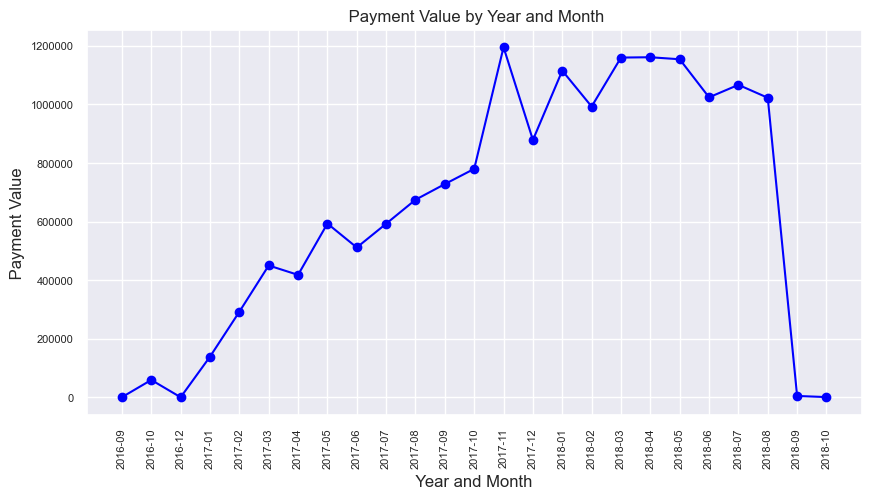

In [28]:
# Create a line plot to visualize payment value trends by Year-Month

plt.figure(figsize = (10,5))
plt.plot(month_value_data['year_month'], month_value_data['payment_value'], color = 'blue', marker = 'o')
plt.ticklabel_format(useOffset=False, style= 'plain', axis = 'y')
plt.xlabel(' Year and Month ')
plt.ylabel(' Payment Value ')
plt.title(' Payment Value by Year and Month' )
plt.xticks(rotation = 90, fontsize = 8)
plt.yticks(fontsize = 8)
plt.show();

```
The analysis shows that payment values grew steadily from 2016-09 to 2017-11, stabilized between 2018-01 and 2018-07, and the sharp decline in 2018-09 to 2018-10 is due to missing data for these two months.
```

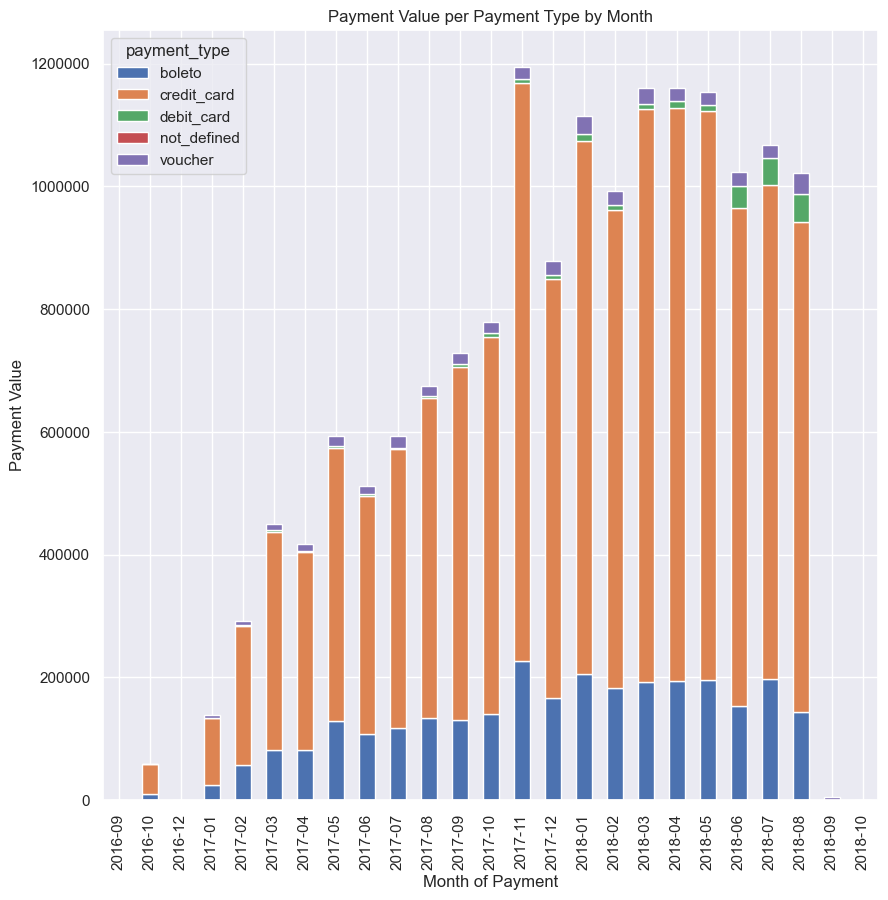

In [29]:
bar_chart_df = cal_groupby_value(final_data, ['payment_type', 'year_month'], 'payment_value', 'sum')

# Pivot the bar_chart_data, to make each payment_type show on each column, and have their payment value on it
pivot_data = bar_chart_df.pivot(index = 'year_month', columns = 'payment_type', values = 'payment_value')

# Plot a stacked bar chart to visualize payment value distribution by payment type over time
pivot_data.plot(kind = 'bar', stacked = 'True', figsize = (10,10))
plt.ticklabel_format(useOffset = False, style= 'plain', axis = 'y')
plt.xlabel('Month of Payment')
plt.ylabel('Payment Value')
plt.title('Payment Value per Payment Type by Month')
plt.show()

```
Credit cards are the primary payment method, with boleto being the second most popular. From 2018-02 to 2018-08, there is a noticeable increase in debit card usage, while the usage of vouchers remains steady. This suggests the need to focus on enhancing the experience for credit card users, while still offering alternatives like boleto and debit cards to accommodate a wider range of customer preferences.
```

In [30]:
# Add new columns to extract the DAY OF WEEK & HOUR OF DAY from the order purchase timestamp
final_data['day_of_week'] = final_data['order_purchase_timestamp'].dt.dayofweek
final_data['hour_of_day'] = final_data['order_purchase_timestamp'].dt.hour

# Group orders by DAY OF WEEK & Hour of DAY and calculate the total order count
orders_day = cal_groupby_value(final_data, 'day_of_week', 'order_id', 'count', {'order_id': 'order_count'})
orders_hour_day = cal_groupby_value(final_data, 'hour_of_day', 'order_id', 'count', {'order_id': 'order_count'})

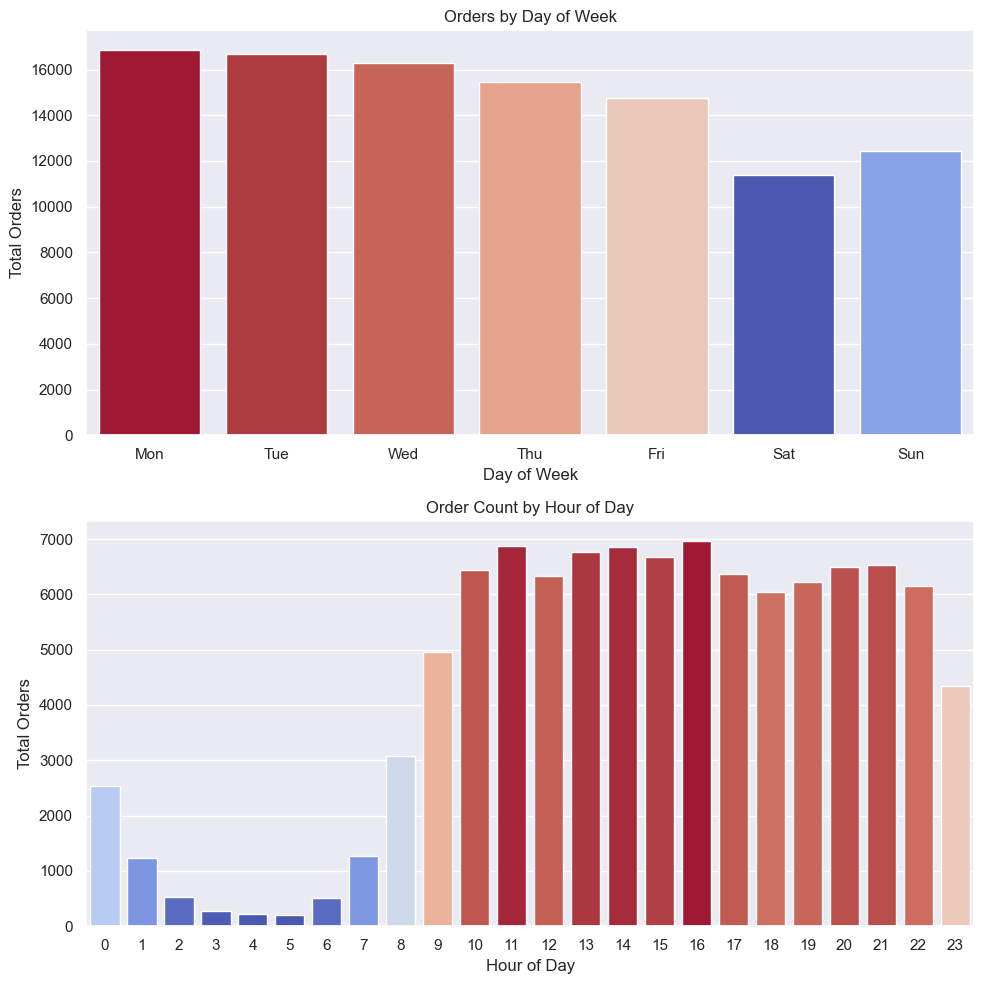

In [31]:
# Plotting orders distribution across DAY OF WEEK and HOUR OF DAY
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.barplot(x='day_of_week', y='order_count', data=orders_day, hue = 'order_count', ax=ax1, palette = 'coolwarm', legend = False)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Total Orders')
ax1.set_xticks(range(7))
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_title('Orders by Day of Week')

sns.barplot(x='hour_of_day', y='order_count', data=orders_hour_day, hue = 'order_count', ax=ax2, palette='coolwarm', legend = False)
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Total Orders')
ax2.set_xticks(ticks=range(24), labels=[str(i) for i in range(24)])
ax2.set_title('Order Count by Hour of Day')
fig.tight_layout()

```
Order volume is highest from Monday to Thursday, indicating stronger purchase demand on weekdays compared to weekends. Therefore, marketing campaigns and promotions could be strategically focused on weekdays to boost conversion rates. Additionally, with peak order volume occurring around midday, targeted promotions or limited-time discounts during this period could further enhance purchase rates.
```

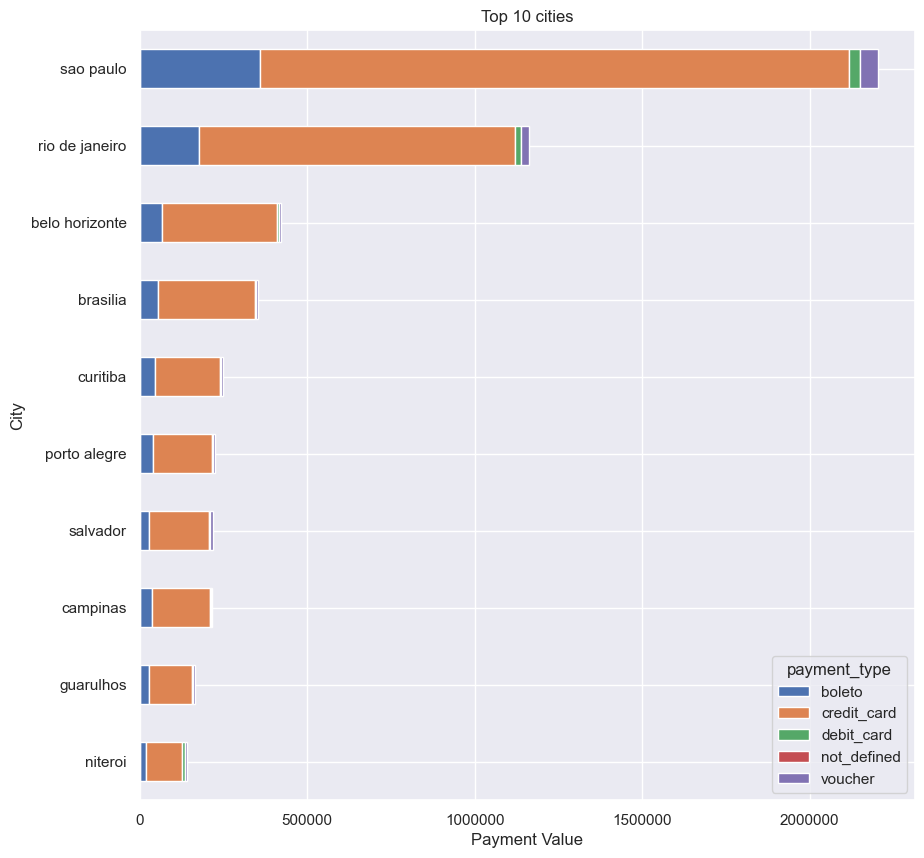

In [32]:
city_payment_type = cal_groupby_value(final_data, ['payment_type', 'customer_city'], 'payment_value', 'sum')

# Identify the top 10 cities with the highest total payment value:
top_10_city = final_data.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False).head(10).index
top_city_payment_df = city_payment_type[city_payment_type['customer_city'].isin(top_10_city)]
pivot_top_df = top_city_payment_df.pivot(index = 'customer_city', columns = 'payment_type', values = 'payment_value')

# Rank the cities according to their total payment value in descending order 
pivot_top_df['total_payment_value'] = pivot_top_df.sum(axis=1)
pivot_top_df = pivot_top_df.sort_values(by = 'total_payment_value', ascending = True)

pivot_top_df.drop(columns='total_payment_value').plot(kind = 'barh', stacked = 'True', figsize = (10,10))
plt.ticklabel_format(useOffset = False, style= 'plain', axis = 'x')
plt.title('Top 10 cities')
plt.xlabel('Payment Value')
plt.ylabel('City')
plt.show();

```
São Paulo and Rio de Janeiro are the largest contributors to payment value, representing key markets for revenue growth. In large cities like São Paulo and Rio de Janeiro, campaigns could focus on promoting diverse payment methods. In smaller cities, where credit cards and boleto dominate, targeted discounts or incentives for these methods might help to drive higher adoption and conversion rates.
```

In [33]:
def calculate_time_differences(data, start_col, end_col, new_col_name):
    data[new_col_name] = (data[end_col] - data[start_col]).dt.total_seconds()/86400
    return data

def process_time_differences(data, tasks):
    for start_col, end_col, new_col_name in tasks:
        data = calculate_time_differences(data, start_col, end_col, new_col_name)
    return data

In [34]:
diff_tasks = [('order_purchase_timestamp', 'order_approved_at', 'purchase_to_approval'),
              ('order_approved_at', 'order_delivered_carrier_date', 'approval_to_shipping'),
              ('order_delivered_carrier_date', 'order_delivered_customer_date', 'shipping_to_delivery')]
final_data = process_time_differences(final_data, diff_tasks)

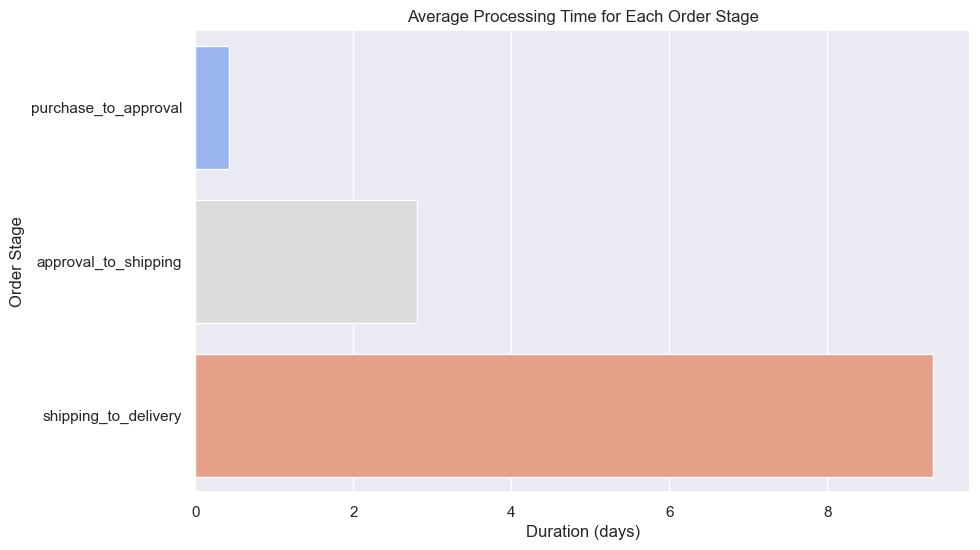

In [35]:
# Create a horizontal bar chart to see the processing time for each order stage 
stage_duration_df = final_data[['purchase_to_approval', 'approval_to_shipping', 
                                'shipping_to_delivery']].mean().reset_index()
stage_duration_df.columns = ['Stage', 'Duration']

plt.figure(figsize=(10, 6))
sns.barplot(x='Duration', y='Stage', data=stage_duration_df, hue = 'Stage', palette='coolwarm')
plt.title("Average Processing Time for Each Order Stage")
plt.xlabel("Duration (days)")
plt.ylabel("Order Stage")
plt.show()

```
The processing time analysis shows that the Purchase to Approval stage is highly efficient, averaging less than one day. However, the Shipping to Delivery stage exceeds Amazon's typical standard of 3-5 days, highlighting the need for improvements in logistics and transportation. Enhancing logistics could increase customer satisfaction and reduce abandonment rates.
```

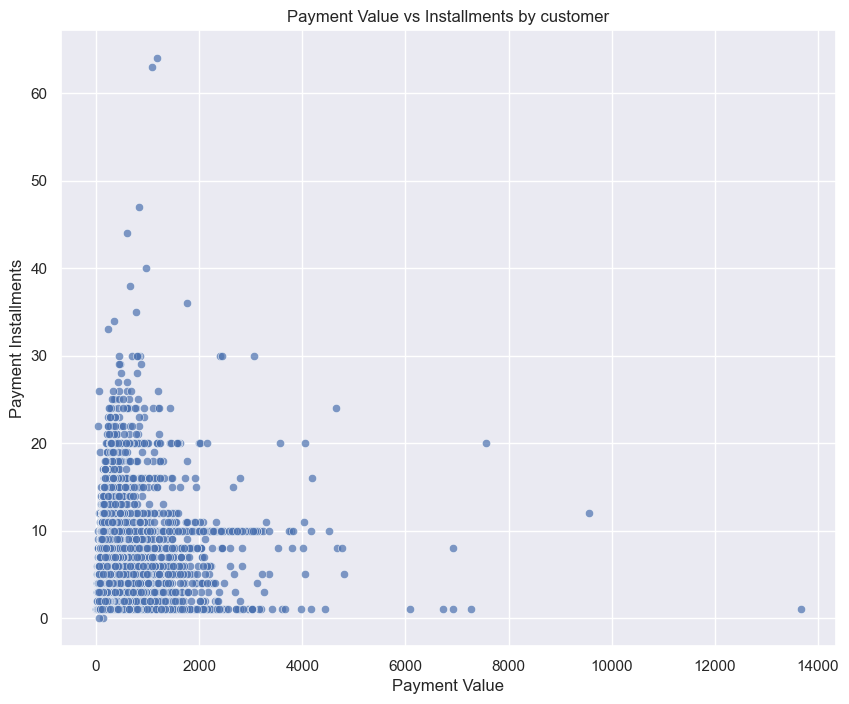

In [36]:
# Create a scatter plot to visualize the relationship between PAYMENT VALUE vs PAYMENT INSTALLMENTS
scatter_df = cal_groupby_value(final_data, 'customer_unique_id', ['payment_value','payment_installments'], 'sum')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'payment_value', y = 'payment_installments', data = scatter_df, alpha = 0.7)
plt.xlabel('Payment Value')
plt.ylabel('Payment Installments')
plt.title('Payment Value vs Installments by customer')
plt.show()

```
This insight shows that customers prefer installment payments for smaller amounts (under 2000), likely for financial flexibility, while larger payments are typically paid in full, suggesting a difference in payment behavior based on transaction size.
```

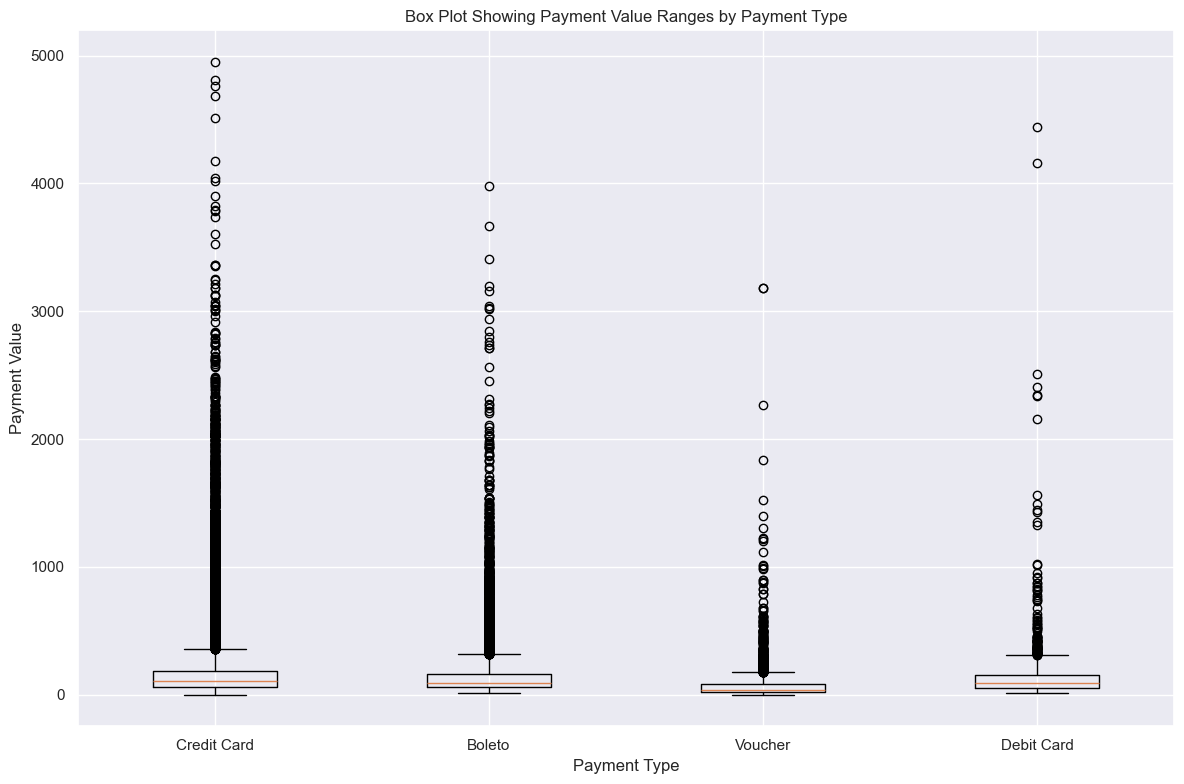

In [37]:
# Filter PAYMENT VALUES to exclude outliers above 5000
payment_values = final_data[final_data['payment_value']<5000]['payment_value']
payment_types = final_data['payment_type']

# Generate box plots for each payment type
plt.figure(figsize = (12,8))

plt.boxplot([ payment_values[payment_types == 'credit_card'],
    payment_values[payment_types == 'boleto'],
    payment_values[payment_types == 'voucher'],
    payment_values[payment_types == 'debit_card']],
    labels = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card'])
plt.xlabel('Payment Type')
plt.ylabel('Payment Value')
plt.title('Box Plot Showing Payment Value Ranges by Payment Type')
plt.tight_layout()
plt.show()

```
The box plot shows similar median payment value across each payment types, with most payments at a lower level. However, the outliers of credit card have the widest range, indicating high volatility and a tendency for users to make high-value payments with more diverse consumption behavior.
```

Text(0.5, 1.0, 'Distribution of Orders by Payment Installments')

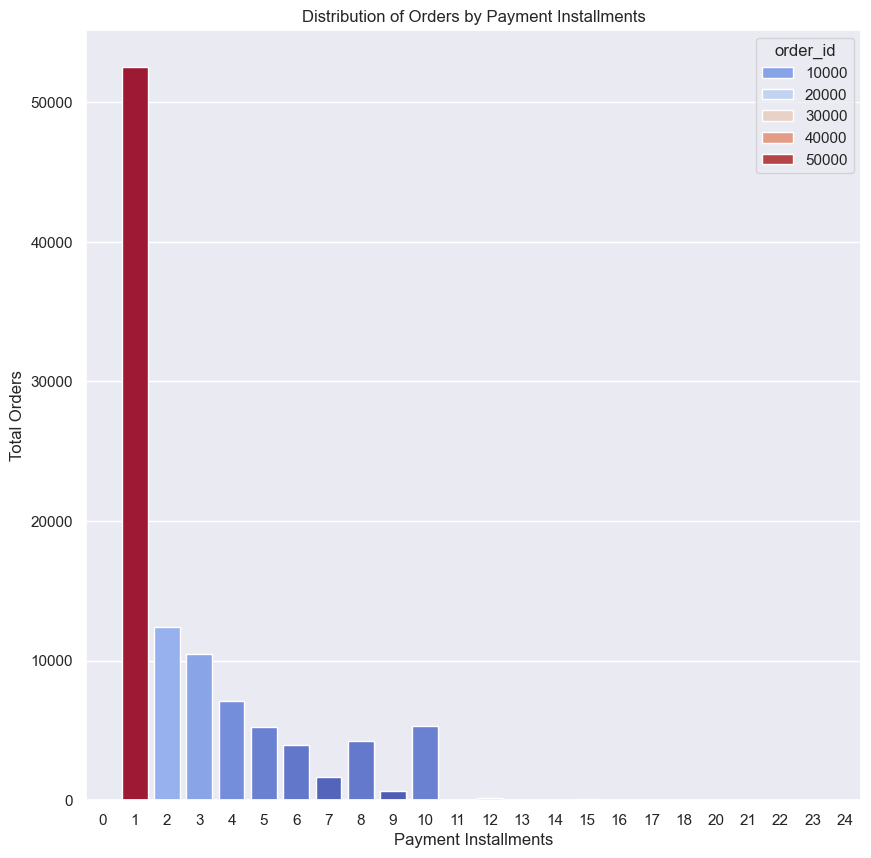

In [38]:
# Create a bar chart to visualize the distribution of total orders by payment installments
installment_distribution = cal_groupby_value(final_data, 'payment_installments', 'order_id', 'count')

plt.figure(figsize = (10,10))
sns.barplot(x = 'payment_installments', y = 'order_id', data = installment_distribution, hue = 'order_id', palette = 'coolwarm')
plt.xlabel('Payment Installments')
plt.ylabel('Total Orders')
plt.title('Distribution of Orders by Payment Installments')

```
Most orders are paid in one-time, indicating a preference for one-time payments. As the number of installments increases, the order volume significantly decreases, with very few orders exceeding 10 installments. However, there are slight peaks at 2 and 3 installments, suggesting that some customers prefer to split payments into smaller, more manageable amounts.
```